In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploring the data¶


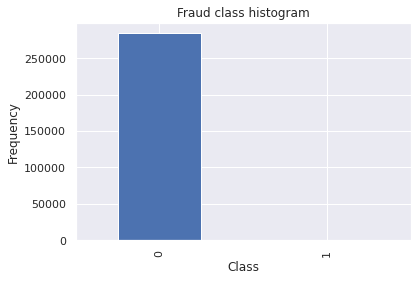

In [4]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()
plt.show()


In [5]:
print('No Frauds = ', data['Class'].value_counts()[0] , ' transactions' ,'--- with a percentage ' ,
      round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds = ' ,data['Class'].value_counts()[1] , ' transactions' ,' --- with percentage  ', 
      round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds =  284315  transactions --- with a percentage  99.83 % of the dataset
Frauds =  492  transactions  --- with percentage   0.17 % of the dataset


# Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)


In [7]:
data.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 492), (1, 492)]


In [10]:
data.columns.values

array(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Class'], dtype=object)

In [11]:
balanced_data = pd.DataFrame(X_resampled,columns = ['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28'])
balanced_data['Class'] = y_resampled
balanced_data.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.712048,-0.152131,-3.698463,0.961788,-4.042964,2.526613,-1.786317,-0.520187,-2.696272,-0.094174,...,0.111530,0.258408,-0.009141,-0.050051,-0.045274,0.037775,0.021279,0.127654,0.095277,0.500000
std,5.086953,0.913433,6.896693,6.988720,6.463243,3.362098,6.359838,3.638052,7.748554,6.035098,...,3.491711,3.486611,1.356247,2.524337,0.504273,0.869876,0.419483,1.642645,1.740172,0.500254
min,-0.353229,-1.988034,-56.407510,-72.715728,-48.325589,-3.518868,-113.743307,-26.160506,-43.557242,-73.216718,...,-54.497720,-34.830382,-10.216283,-30.669842,-2.028024,-7.053554,-2.569440,-9.554344,-15.430084,0.000000
25%,-0.320142,-0.835830,-4.617278,-0.364391,-5.595078,-0.011125,-2.245171,-1.718998,-3.636231,-0.244238,...,-0.186891,-0.158998,-0.451115,-0.208926,-0.269430,-0.266685,-0.221355,-0.049407,-0.052235,0.000000
50%,-0.157229,-0.197653,-1.270630,1.040846,-1.886640,1.712492,-0.533065,-0.610411,-0.881948,0.149047,...,0.042502,0.135604,0.021742,-0.034516,-0.004671,0.043531,0.000448,0.043308,0.026252,0.500000
75%,0.066011,0.849501,0.287972,3.144460,0.108909,4.621160,0.560572,0.242219,0.256909,0.912601,...,0.545698,0.747576,0.482187,0.206821,0.183406,0.362785,0.226988,0.511708,0.222118,1.000000
max,102.362243,1.590592,2.189118,22.057729,3.242888,16.795441,34.801666,73.301626,120.589494,20.007208,...,38.769057,27.202839,10.503090,22.528412,4.584549,7.519589,3.415636,31.612198,33.847808,1.000000


# - features distributions are gaussian like , with some outliers specially for feature V2
# - using interquartile range method to remove extreme outliers.
# - you can see illustration below


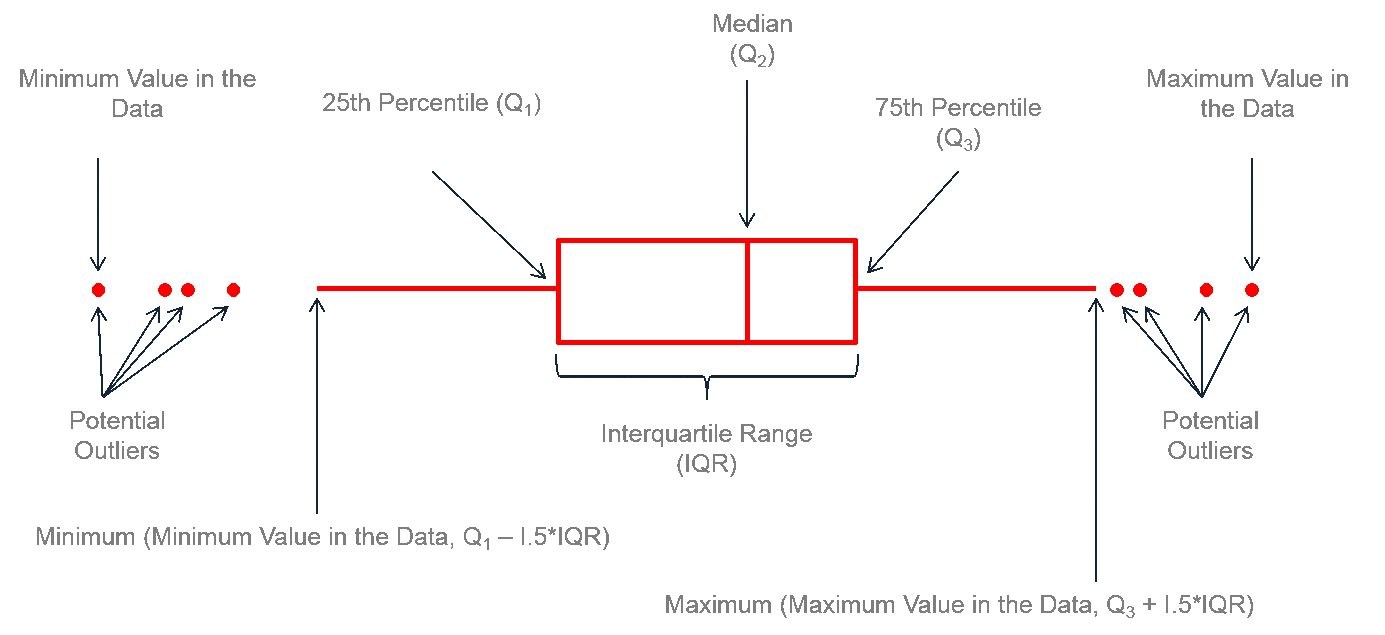

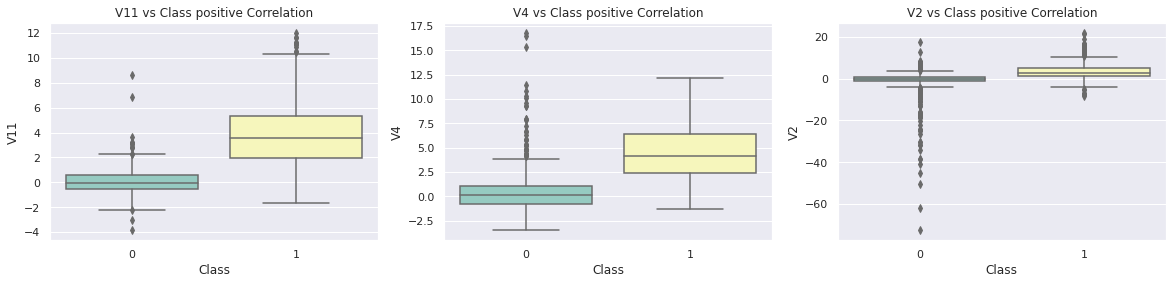

In [12]:
f, axes = plt.subplots( nrows=1 , ncols= 3, figsize=(20,4))


sns.boxplot(x="Class", y="V11", data=balanced_data, palette="Set3", ax=axes[0])
axes[0].set_title('V11 vs Class positive Correlation')


sns.boxplot(x="Class", y="V4", data=balanced_data, palette="Set3", ax=axes[1])
axes[1].set_title('V4 vs Class positive Correlation')


sns.boxplot(x="Class", y="V2", data=balanced_data, palette="Set3", ax=axes[2])
axes[2].set_title('V2 vs Class positive Correlation')
plt.show()

In [13]:
# Removing outliers V11 Feature
V11_fraud = balanced_data['V11'].values
q25, q75 = np.percentile(V11_fraud, 25), np.percentile(V11_fraud, 75)

V11_iqr = q75 - q25
V11_cut_off = V11_iqr * 1.5
V11_lower, V11_upper = q25 - V11_cut_off, q75 + V11_cut_off

print('V11 Lower: ', V11_lower)
print('V11 Upper: ', V11_upper)
outliers = [x for x in V11_fraud if x < V11_lower or x > V11_upper]

print('V11 outliers:' , outliers)
print('Feature V11 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V11'] > V11_upper) | (balanced_data['V11'] < V11_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))

V11 Lower:  -5.691129186917676
V11 Upper:  9.17109184927317
V11 outliers: [12.018913181619899, 10.8530116481991, 11.6197234753825, 11.6692047358121, 10.446846814514, 11.228470279576001, 11.277920727806698, 11.152490598583698, 11.0270590938161, 9.36907905765884, 9.32879925655782, 10.5452629545898, 10.2777688628065, 10.187587324166401, 10.0637897462894, 9.939819741725689, 9.81570317447819, 9.691460982073188, 9.567110295213972, 9.44266526535108, 9.318137685359991, 9.41303953977606]
Feature V11 Outliers for Fraud Cases: 22
Number of Instances after outliers removal:  962


In [14]:
# Removing outliers V4 Feature
V4_fraud = balanced_data['V4'].values
q25, q75 = np.percentile(V4_fraud, 25), np.percentile(V4_fraud, 75)

V4_iqr = q75 - q25
V4_cut_off = V4_iqr * 1.5
V4_lower, V4_upper = q25 - V4_cut_off, q75 + V4_cut_off

print('V4 Lower: ', V4_lower)
print('V4 Upper: ', V4_upper)
outliers = [x for x in V4_fraud if x < V4_lower or x > V4_upper]

print('V4 outliers:' , outliers)
print('Feature V4 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V4'] > V4_upper) | (balanced_data['V4'] < V4_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))


V4 Lower:  -6.666014327331762
V4 Upper:  10.944511767366095
V4 outliers: [15.3041839851875, 16.7954407029553, 16.4912171736623, 11.474589567349101, 11.1908946558522, 11.3451198184298, 11.1227714331133, 12.114671842458902, 11.1254347149714, 11.7374361361796, 11.8450129100508]
Feature V4 Outliers for Fraud Cases: 11
Number of Instances after outliers removal:  951


In [15]:
# Removing outliers V2 Feature
### in this feature i have increased the cut off factor to 2.5 becasue we many outliers in this feature , if we removed all of them we might have the risk of losing too much information ###
V2_fraud = balanced_data['V2'].values
q25, q75 = np.percentile(V2_fraud, 25), np.percentile(V2_fraud, 75)

V2_iqr = q75 - q25
V2_cut_off = V2_iqr * 2.5
V2_lower, V2_upper = q25 - V2_cut_off, q75 + V2_cut_off

print('V2 Lower: ', V2_lower)
print('V2 Upper: ', V2_upper)
outliers = [x for x in V2_fraud if x < V2_lower or x > V2_upper]

print('V2 outliers:' , outliers)
print('Feature V2 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V2'] > V2_upper) | (balanced_data['V2'] < V2_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))


V2 Lower:  -8.706260851231761
V2 Upper:  11.216438499756828
V2 outliers: [-18.10276468619214, -17.08359737467078, -20.280266966794024, -38.5111181079804, -13.26256078130689, -25.193303355724396, -9.306007578429544, -50.3832691251379, -9.943617095909842, -17.269612892225204, 17.456164651317184, -15.814965029753468, -38.2815543333841, -30.478615321494637, -21.984672374463976, -8.755576108546496, -26.51523729516014, -17.673852623971452, -45.27715731285848, -31.68843231155962, 12.7938800832324, -24.054064597052765, -11.004088410062963, -16.1589434908983, -13.254853674503654, -30.31263086208988, -24.39164754500048, -16.52441681619472, -10.873263440313272, -18.808501189431723, -10.620337280841417, -34.29396925824118, -17.128913253312493, -12.2358586545456, 11.586380519818402, 11.817921989785301, 12.095893225929899, 12.3739891389716, 12.6521968313004, 12.9305051249875, 13.208904284417601, 13.4873857909274, 13.7659421584186, 14.044566781510598, 14.323253809723301, 14.6019980426299, 15.36580438

In [16]:
print('No Frauds = ', balanced_data['Class'].value_counts()[0] , ' transactions' ,'--- with a percentage ' ,
      round(balanced_data['Class'].value_counts()[0]/len(balanced_data) * 100,2), '% of the dataset')
print('Frauds = ' ,balanced_data['Class'].value_counts()[1] , ' transactions' ,' --- with percentage  ', 
      round(balanced_data['Class'].value_counts()[1]/len(balanced_data) * 100,2), '% of the dataset')


No Frauds =  454  transactions --- with a percentage  51.24 % of the dataset
Frauds =  432  transactions  --- with percentage   48.76 % of the dataset


In [17]:
X = balanced_data.iloc[:, :-1].values
y = balanced_data.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth = 5 , gamma = 0.2 ,colsample_bytree = 0.8,
                           subsample = 0.8,objective= 'binary:logistic')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       114
           1       1.00      0.94      0.97       108

    accuracy                           0.97       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.97      0.97      0.97       222



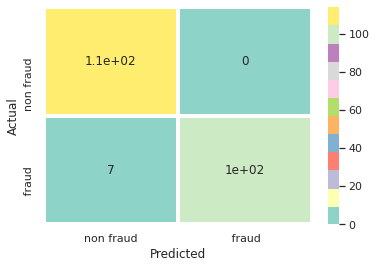

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


y_actual = ["non fraud"," fraud"]
y_predicted = ["non fraud"," fraud"]

df_cm = pd.DataFrame(cm, columns=(y_predicted), index = (y_actual))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.heatmap(df_cm,linewidths=3, cmap="Set3", annot=True)
plt.show()